## Prerequsites and validation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("synthetic_financial_wellbeing.csv")
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import resample


In [32]:
np.random.seed(42)  

In [33]:
df.head()

,raw_stability,financial_stability,borrowing_frequency,afford_essentials,emotional_wellbeing,income_range,financial_awareness,bnpl_user
0,2.897371,3.0,2.0,2.0,3.0,3.0,3.0,0
1,2.389389,2.0,2.0,2.0,2.0,2.0,2.0,0
2,3.018151,3.0,2.0,2.0,3.0,3.0,3.0,1
3,3.718424,4.0,2.0,2.0,5.0,4.0,4.0,0
4,2.312677,2.0,3.0,3.0,2.0,2.0,2.0,1


In [34]:
df.info

<bound method DataFrame.info of      raw_stability  financial_stability  borrowing_frequency  \
0         2.897371                  3.0                  2.0   
1         2.389389                  2.0                  2.0   
2         3.018151                  3.0                  2.0   
3         3.718424                  4.0                  2.0   
4         2.312677                  2.0                  3.0   
..             ...                  ...                  ...   
295       1.945672                  2.0                  3.0   
296       3.219680                  3.0                  2.0   
297       2.745840                  3.0                  2.0   
298       3.150290                  3.0                  2.0   
299       3.003703                  3.0                  2.0   

     afford_essentials  emotional_wellbeing  income_range  \
0                  2.0                  3.0           3.0   
1                  2.0                  2.0           2.0   
2               

In [35]:
df.describe()

,raw_stability,financial_stability,borrowing_frequency,afford_essentials,emotional_wellbeing,income_range,financial_awareness,bnpl_user
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.489279,2.516667,2.493333,2.516667,2.580000,2.593333,2.496667,0.563333
std,0.736146,0.790658,0.855802,0.886383,1.101959,1.025407,0.897780,0.496801
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.953403,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,2.547376,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,1.000000
75%,3.001326,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000


In [36]:
df.isna().sum()

raw_stability          0
financial_stability    0
borrowing_frequency    0
afford_essentials      0
emotional_wellbeing    0
income_range           0
financial_awareness    0
bnpl_user              0
dtype: int64

## Exploratory Data Anlysis 

In [37]:
# Visulising the distribution of stability

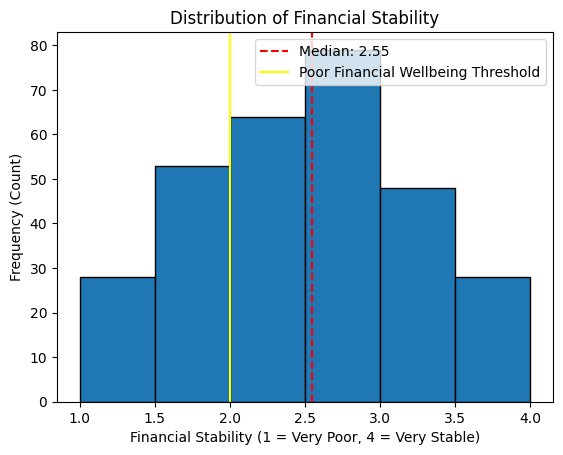

In [68]:
raw_stability = df['raw_stability']
raw_median = raw_stability.median()

plt.hist(x=raw_stability, bins=6, edgecolor='black')
plt.xlabel('Financial Stability (1 = Very Poor, 4 = Very Stable)')
plt.title('Distribution of Financial Stability')
plt.ylabel('Frequency (Count)')
plt.axvline(
    x=raw_median, 
    color='red', 
    linestyle='--',
    label=f'Median: {raw_median:.2f}')
plt.axvline(
    x=2, 
    color='Yellow', 
    linestyle='-',
    label='Poor Financial Wellbeing Threshold')
plt.savefig('dist.png',dpi=300)
plt.legend()

In [39]:
# Buy-Now-Pay-Later

([<matplotlib.axis.XTick at 0xc717258>, <matplotlib.axis.XTick at 0xc5d5a98>],
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

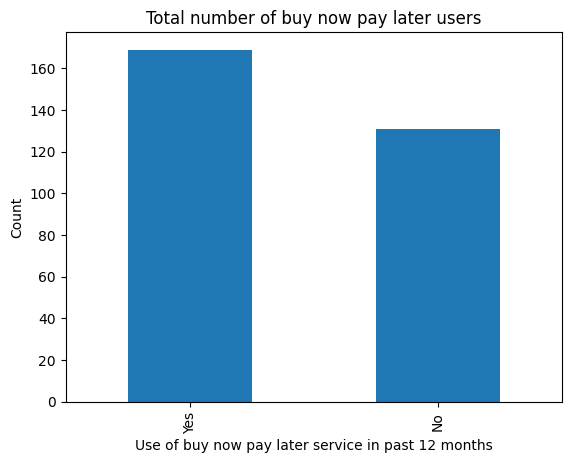

In [40]:
df['bnpl_user'].value_counts().plot(kind='bar')
plt.title('Total number of buy now pay later users')
plt.xlabel('Use of buy now pay later service in past 12 months')

plt.ylabel('Count')
plt.xticks(
    ticks=[0, 1],
    labels=['Yes', 'No'] 
)

In [41]:
# Useage vs financial wellbeing

In [42]:
bnpl_use = df['bnpl_user']
financial_stability = df['financial_stability']

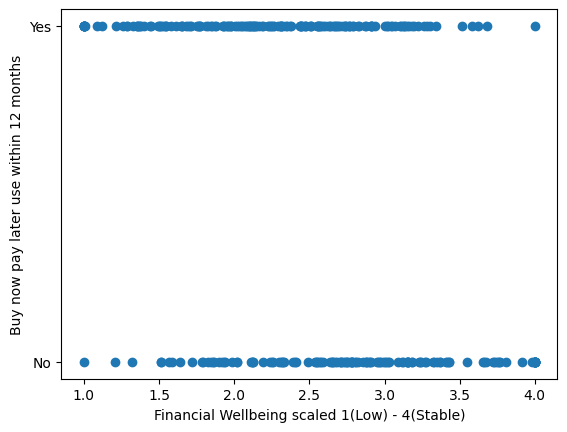

In [56]:
plt.scatter(x=raw_stability,y=bnpl_use)
plt.xlabel('Financial Wellbeing scaled 1(Low) - 4(Stable)')
plt.ylabel('Buy now pay later use within 12 months')
plt.yticks(
    ticks=[0, 1], 
    labels=['No', 'Yes'] 
)
plt.savefig('scatter.png', dpi=300)

### Logistic Regression

#### Model Development

In [44]:
X = df[['raw_stability']]
Y = bnpl_use

In [45]:
LogReg = LogisticRegression()

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

In [2]:
LogReg.fit(X_train,Y_train)
Y_pred = LogReg.predict(X_test)
df_copy = X_test.copy()
df_copy['Test values'] = Y_test
df_copy['Predicted values'] = Y_pred

<class 'NameError'>: name 'LogReg' is not defined

#### Statistical Inference

In [48]:
# Coefficient Interpretation

In [49]:
coefs = LogReg.coef_.flatten()
intercept = LogReg.intercept_[0]
odds_ratios = np.exp(coefs)

coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': coefs,
    'Odds_Ratio': odds_ratios
})

In [50]:
coef_df.head()

,Variable,Coefficient,Odds_Ratio
0,raw_stability,-1.020748,0.360325


In [51]:
# Confidence Intervals

In [52]:
n_boot = 1000
boot_coefs = np.zeros((n_boot, X.shape[1]))

for i in range(n_boot):
    X_res, y_res = resample(X_train, Y_train, replace=True, random_state=42+i)
    model = LogisticRegression(solver='liblinear', random_state=42+i)
    model.fit(X_res, y_res)
    boot_coefs[i, :] = model.coef_

ci_lower = np.percentile(boot_coefs, 2.5, axis=0)
ci_upper = np.percentile(boot_coefs, 97.5, axis=0)

coef_df['95% CI Lower'] = np.exp(ci_lower)
coef_df['95% CI Upper'] = np.exp(ci_upper)

print(coef_df)

        Variable  Coefficient  Odds_Ratio  95% CI Lower  95% CI Upper
0  raw_stability    -1.020748    0.360325      0.338849      0.611838


### Model Evaluation

#### Confusion Matrix

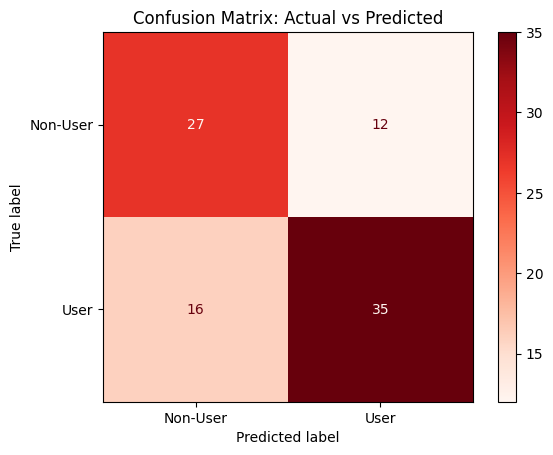

In [57]:
custom_labels = ["Non-User", "User"]
conf_matrix = confusion_matrix(Y_test,Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=custom_labels)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.savefig('confusion_matrix.png', dpi=300)

#### Probabilistic mapping

/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


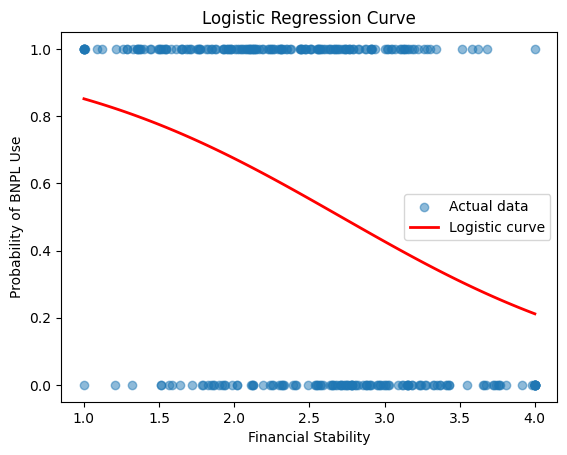

In [58]:
X_range = np.linspace(X['raw_stability'].min(), X['raw_stability'].max(), 100).reshape(-1, 1)
# Smooths data into a 2d range of 100 points
y_pred_prob_range = LogReg.predict_proba(X_range)[:, 1]
# Predicts probability of values within X_range of BNPL use

# Scatter actual data
plt.scatter(X['raw_stability'], Y, alpha=0.5, label="Actual data")

# Plot logistic regression curve
plt.plot(X_range, y_pred_prob_range, color="red", linewidth=2, label="Logistic curve")

# Labels and title
plt.xlabel("Financial Stability")
plt.ylabel("Probability of BNPL Use")
plt.title("Logistic Regression Curve")
plt.legend()
plt.savefig('log_curve.png', dpi=300)
plt.show()

#### ROC and AUC

In [62]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

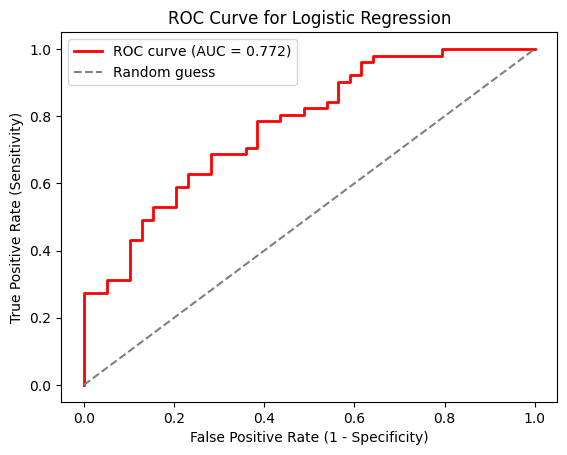

In [63]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
auc_score = roc_auc_score(Y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, color='red', linewidth=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.savefig('ROC.png')
plt.show()

#### Precision, Recall and F1

In [64]:
TN, FP, FN, TP = conf_matrix.ravel()
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1 = 2 * ((Precision * Recall) / (Precision + Recall))

In [65]:
print("F1 score:", round(F1, 3))
print("Precision:",round(Precision,3))
print("Recall:", round(Recall, 3))

F1 score: 0.714
Precision: 0.745
Recall: 0.686


#### Accuracy and pseudo r2

In [66]:
Accuracy = LogReg.score(X_test,Y_test)

import numpy as np

# Predicted probabilities
y_pred_prob_test = LogReg.predict_proba(X_test)[:, 1]

# Log-likelihood of the fitted model
eps = 1e-15  # to avoid log(0)
ll_model = np.sum(Y_test * np.log(y_pred_prob_test + eps) + (1 - Y_test) * np.log(1 - y_pred_prob_test + eps))

# Log-likelihood of the null model (intercept only)
y_mean = np.mean(Y_test)
ll_null = np.sum(Y_test * np.log(y_mean + eps) + (1 - Y_test) * np.log(1 - y_mean + eps))

# McFadden's pseudo R²
pseudo_r2 = 1 - (ll_model / ll_null)


#### Summary

In [67]:
print("McFadden's pseudo R²:", round(pseudo_r2, 3))
print("Accuracy is:",round(Accuracy,3))
print("AUC Score:", round(auc_score, 3))

McFadden's pseudo R²: 0.163
Accuracy is: 0.689
AUC Score: 0.772
